<a href="https://colab.research.google.com/github/1Pampu/BigData-ML-Proyectos/blob/main/Trabajo%20Final/Trabajo_Final_Big_Data_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos

In [1]:
import os, shutil, gdown, zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Crear directorio para almacenar los datos descargados
download_dir = "downloaded_data"
os.makedirs(download_dir, exist_ok = True)

url = "https://drive.google.com/uc?export=download&id=19ZgvHREcc3SGYST_Nczl5XiHHgwvFPbp"
output = download_dir + '/dataset-xray.zip'
gdown.download(url, output , quiet = False)
print("Descarga Completa!")

print("Extrayendo archivos...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    # Extrae todos los archivos en el directorio de destino
    zip_ref.extractall(download_dir)
print("Datos extraidos!")

Downloading...
From (uriginal): https://drive.google.com/uc?export=download&id=19ZgvHREcc3SGYST_Nczl5XiHHgwvFPbp
From (redirected): https://drive.google.com/uc?export=download&id=19ZgvHREcc3SGYST_Nczl5XiHHgwvFPbp&confirm=t&uuid=eea6dd6b-a3ae-4803-b0fd-cd73348dcc53
To: d:\NextCloud\github\BigData-ML-Proyectos\Trabajo Final\downloaded_data\dataset-xray.zip
100%|██████████| 199M/199M [00:17<00:00, 11.1MB/s] 
[WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'downloaded_data\\dataset-xray.zipo2m4vol1tmp'


Descarga Completa!
Extrayendo archivos...
Datos extraidos!


In [3]:
# Definir las categorías
categories = ["COVID-19", "NEUMONIA", "NORMAL"]

# Cargar datos de las carpetas extraídas
data = []
label = []

print("Cargando datos...")
for category in categories:
    print(f"Cargando radiografias de {category}...")
    for file in os.listdir(download_dir + "/" + category):
        dir = download_dir + "/" + category + "/" + file
        img = imread(dir, as_gray = True)
        img = resize(img, (256, 256))
        data.append(img.flatten())
        label.append(categories.index(category))
print("Todos los datos cargados!")

Cargando datos...
Cargando radiografias de COVID-19...


Cargando radiografias de NEUMONIA...
Cargando radiografias de NORMAL...
Todos los datos cargados!


In [4]:
print("Eliminando el directorio descargado...")
shutil.rmtree(download_dir)
print("Directorio eliminado.")

Eliminando el directorio descargado...


Directorio eliminado.


In [5]:
data = np.asarray(data)
label = np.asarray(label)

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, shuffle = True, stratify = label, random_state = 42)

# SVC / SVM

In [13]:
svm_model = SVC(C = 15, kernel = "rbf", gamma = "scale")
svm_model.fit(x_train, y_train)

SVC(C=15)

In [14]:
# Realizamos una validación cruzada para evaluar el rendimiento del modelo
scores = cross_val_score(svm_model, x_train, y_train, cv = 5)
average_accuracy = scores.mean()
print("Validación Cruzada: {:.2f}%".format(average_accuracy * 100))

# Realizamos predicciones en el conjunto de prueba
svc_predictions = svm_model.predict(x_test)

# Calculamos accuracy
accuracy = accuracy_score(y_test, svc_predictions)
print("Accuracy:", accuracy)

# Calculamos precision
precision = precision_score(y_test, svc_predictions, average = None)
print("Precision:", precision)

# Calculamos recall
recall = recall_score(y_test, svc_predictions, average = None)
print("Recall:", recall)

# Calculamos f1-score
f1 = f1_score(y_test, svc_predictions, average = None)
print("F1-score:", f1)

Validación Cruzada: 90.87%
Accuracy: 0.9173553719008265
Precision: [0.95454545 0.96       0.86538462]
Recall: [0.95454545 0.8        0.95744681]
F1-score: [0.95454545 0.87272727 0.90909091]


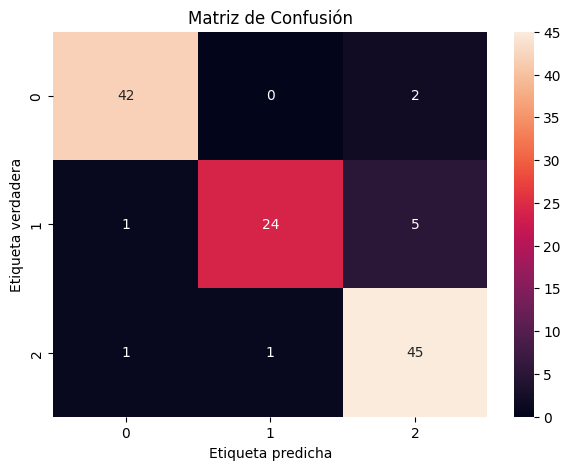

In [15]:
# Se calcula una matriz de confusión
conf_matrix = confusion_matrix(y_test, svc_predictions)

# Se crea un gráfico que muestra la matriz con anotaciones de los valores y etiquetas
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')

# Mostramos la visualización de la matriz de confusión
plt.show()

# KNN

In [6]:
# Creamos un modelo KNN con los parametros especificados por la función y entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = "auto", leaf_size = 10, p = 1, weights = "uniform")
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=10, p=1)

In [7]:
# Realizamos una validación cruzada para evaluar el rendimiento del modelo
scores = cross_val_score(knn, x_train, y_train, cv=5)
average_accuracy = scores.mean()
print("Validación Cruzada: {:.2f}%".format(average_accuracy * 100))

# Realizamos predicciones en el conjunto de prueba
knn_predictions = knn.predict(x_test)

# Calculamos accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

# Calculamos precision
precision = precision_score(y_test, knn_predictions, average = None)
print("Precision:", precision)

# Calculamos recall
recall = recall_score(y_test, knn_predictions, average = None)
print("Recall:", recall)

# Calculamos f1-score
f1 = f1_score(y_test, knn_predictions, average = None)
print("F1-score:", f1)

Validación Cruzada: 85.05%
Accuracy: 0.8347107438016529
Precision: [0.90909091 0.69444444 0.87804878]
Recall: [0.90909091 0.83333333 0.76595745]
F1-score: [0.90909091 0.75757576 0.81818182]


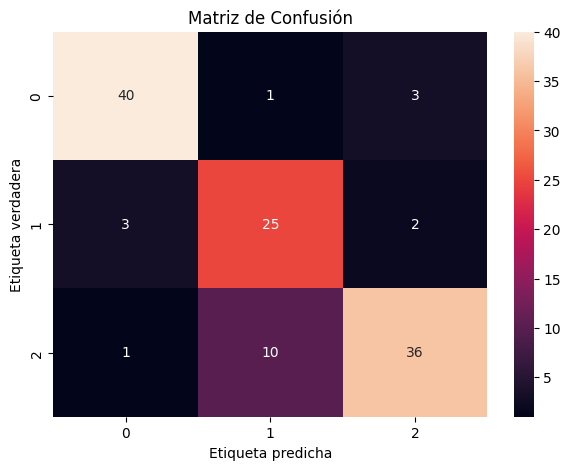

In [8]:
# Se calcula una matriz de confusión
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Se crea un gráfico que muestra la matriz con anotaciones de los valores y etiquetas
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')

# Mostramos la visualización de la matriz de confusión
plt.show()

# RTC

In [6]:
rtc = RandomForestClassifier(random_state = 42, max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)
rtc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [7]:
# Realizamos una validación cruzada para evaluar el rendimiento del modelo
scores = cross_val_score(rtc, x_train, y_train, cv=5)
average_accuracy = scores.mean()
print("Validación Cruzada: {:.2f}%".format(average_accuracy * 100))

# Realizamos predicciones en el conjunto de prueba
rtc_predictions = rtc.predict(x_test)

# Calculamos accuracy
accuracy = accuracy_score(y_test, rtc_predictions)
print("Accuracy:", accuracy)

# Calculamos precision
precision = precision_score(y_test, rtc_predictions, average = None)
print("Precision:", precision)

# Calculamos recall
recall = recall_score(y_test, rtc_predictions, average = None)
print("Recall:", recall)

# Calculamos f1-score
f1 = f1_score(y_test, rtc_predictions, average = None)
print("F1-score:", f1)

Validación Cruzada: 86.53%
Accuracy: 0.8347107438016529
Precision: [0.88888889 0.9047619  0.76363636]
Recall: [0.90909091 0.63333333 0.89361702]
F1-score: [0.8988764  0.74509804 0.82352941]


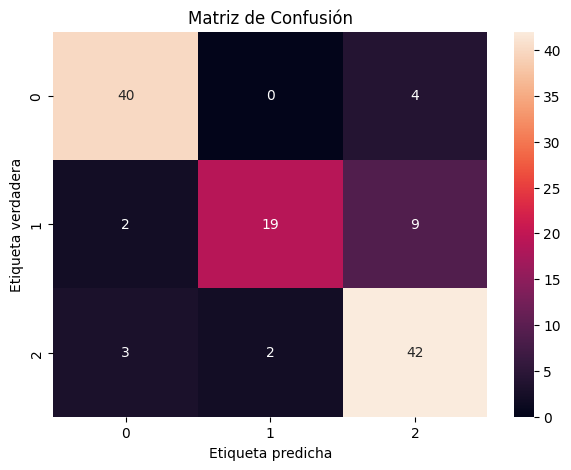

In [8]:
# Se calcula una matriz de confusión
conf_matrix = confusion_matrix(y_test, rtc_predictions)

# Se crea un gráfico que muestra la matriz con anotaciones de los valores y etiquetas
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')

# Mostramos la visualización de la matriz de confusión
plt.show()